## Titanic Kaggle Project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [46]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [47]:
data = [df_train,df_test]

In [48]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
sns.set(style='whitegrid')

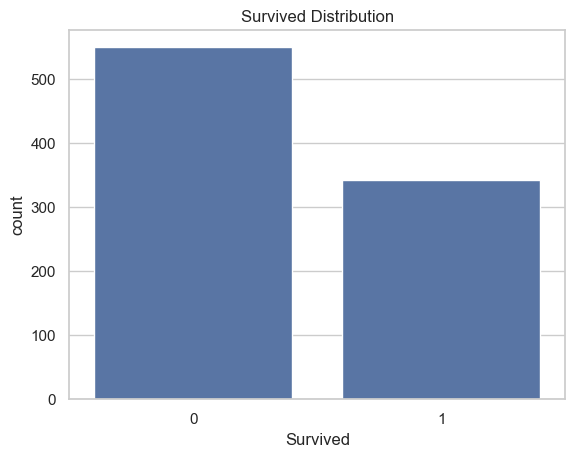

In [52]:
sns.countplot(x='Survived',data=df_train)
plt.title('Survived Distribution')
plt.show()

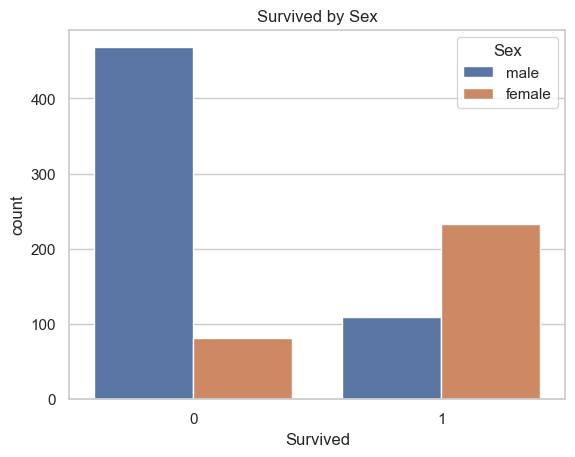

In [53]:
sns.countplot(x='Survived',hue='Sex',data=df_train)
plt.title('Survived by Sex')
plt.show()

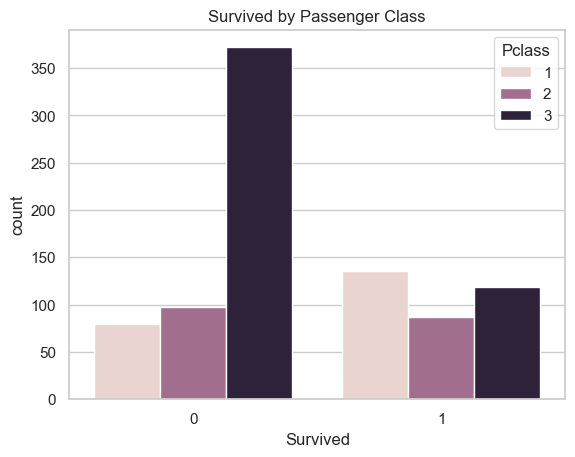

In [54]:
sns.countplot(x='Survived',hue='Pclass',data=df_train)
plt.title('Survived by Passenger Class')
plt.show()

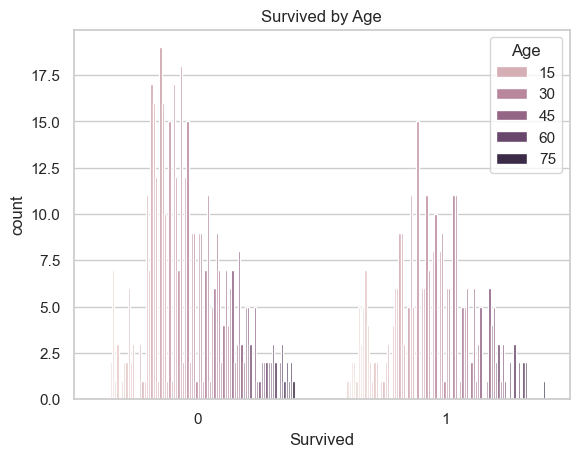

In [55]:
sns.countplot(x='Survived',hue='Age',data=df_train)
plt.title('Survived by Age')
plt.show()

## Feature Engineering & Cleaning

In [56]:
for dataset in data:
    dataset['Age'] =dataset.groupby(['Pclass','Age'])['Age'].transform(lambda x: x.fillna(x.median()))

In [57]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [58]:
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

In [59]:
# Extract titles
for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


# Simplify titles
for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

# Map titles
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [60]:
df_train.Title

0      1
1      3
2      2
3      3
4      1
      ..
886    5
887    2
888    2
889    1
890    1
Name: Title, Length: 891, dtype: int64

## Encoding Categorical Variables


In [61]:
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1})

In [62]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1, 'Q':2})

## Drop Unused Features & Train/Test Split


In [63]:
drop_columns = ['PassengerId','Name','Ticket','Cabin']

In [64]:
df_train.drop(columns=drop_columns, inplace=True)


In [65]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,5
887,1,1,1,19.0,0,0,30.0000,0,2
888,0,3,1,NaN,1,2,23.4500,0,2
889,1,1,0,26.0,0,0,30.0000,1,1


In [66]:
df_test = df_test.drop(columns=drop_columns)


In [67]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,2,1
1,3,1,47.0,1,0,7.0000,0,3
2,2,0,62.0,0,0,9.6875,2,1
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,3
...,...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,0,1
414,1,1,39.0,0,0,108.9000,1,5
415,3,0,38.5,0,0,7.2500,0,1
416,3,0,NaN,0,0,8.0500,0,1


In [68]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training Evaluation

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_valid_imputed = imputer.transform(X_valid)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_imputed, y_train)

y_pred_log = log_model.predict(X_valid_imputed)

In [73]:
print("Logistic Regression Accuracy:", accuracy_score(y_valid, y_pred_log))

Logistic Regression Accuracy: 0.7821229050279329


In [74]:
print(confusion_matrix(y_valid, y_pred_log))


[[86 19]
 [20 54]]


In [75]:
print(classification_report(y_valid, y_pred_log))


              precision    recall  f1-score   support

           0       0.81      0.82      0.82       105
           1       0.74      0.73      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [76]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_valid)

In [77]:
print("Random Forest Accuracy:", accuracy_score(y_valid, y_pred_rf))
print(confusion_matrix(y_valid, y_pred_log))
print(classification_report(y_valid, y_pred_rf))

Random Forest Accuracy: 0.8435754189944135
[[86 19]
 [20 54]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       105
           1       0.82      0.80      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



## Feature Importance (Random Forest - Best Performer)


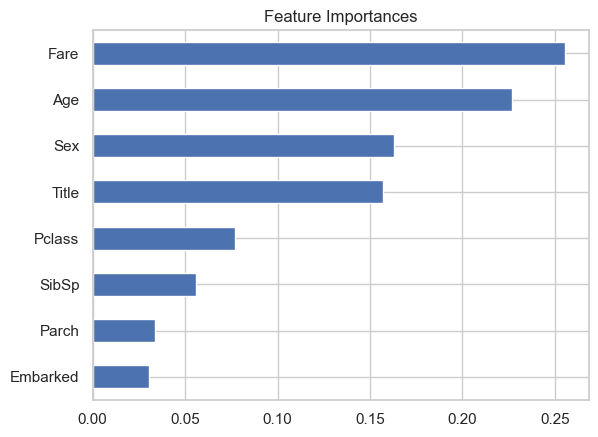

In [78]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [80]:
df_train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1
5,0,3,0,NaN,0,0,8.4583,2,1
6,0,1,0,54.0,0,0,51.8625,0,1
7,0,3,0,2.0,3,1,21.0750,0,4
8,1,3,1,27.0,0,2,11.1333,0,3
9,1,2,1,14.0,1,0,30.0708,1,3


In [82]:
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv=5)
print("5-Fold CV Accuray:", cv_scores.mean())

5-Fold CV Accuray: 0.8058251208335949
